<a href="https://colab.research.google.com/github/jouherdauf/Hotel_booking_Analysis/blob/main/Hotel%20Booking%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project Name - Hotel Booking Analysis**

**Project Type** - EDA\
**Contribution** - Individual\
**Team Member**  - Jouher Lais Khan


# **Problem Statement**

**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**\
**This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**\
**Explore and analyse the data to discover important factors that govern the bookings.**

# **Let's Begin**

In [10]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
from google.colab import drive   # Mounting  the google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
htl_bkn = pd.read_csv(('/content/drive/MyDrive/Hotel_Analysis/Hotel Bookings.csv'))
country = pd.read_csv(('/content/drive/MyDrive/Hotel_Analysis/country.csv'))

In [13]:
htl_bkn.head()  # A overview of the data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
len(htl_bkn.axes[0]),len(htl_bkn.axes[1])

(119390, 32)

In [15]:
htl_bkn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
htl_bkn.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null values.

In [17]:
 # Count the Unique Element of all column and there counts
lengths = sorted([len(s) for s in sorted(htl_bkn)])
space = lengths[-1]*' '
for i in sorted(htl_bkn):
  if htl_bkn[i].nunique() <= 10:
    print(f'{i} {space[len(i):27]}{htl_bkn[i].nunique()} {htl_bkn[i].unique()}')


arrival_date_year           3 [2015 2016 2017]
babies                      5 [ 0  1  2 10  9]
children                    5 [ 0.  1.  2. 10.  3. nan]
customer_type               4 ['Transient' 'Contract' 'Transient-Party' 'Group']
deposit_type                3 ['No Deposit' 'Refundable' 'Non Refund']
distribution_channel        5 ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
hotel                       2 ['Resort Hotel' 'City Hotel']
is_canceled                 2 [0 1]
is_repeated_guest           2 [0 1]
market_segment              8 ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
meal                        5 ['BB' 'FB' 'HB' 'SC' 'Undefined']
required_car_parking_spaces 5 [0 1 2 8 3]
reservation_status          3 ['Check-Out' 'Canceled' 'No-Show']
reserved_room_type          10 ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
total_of_special_requests   6 [0 1 3 2 4 5]


# **2. Cleaning the Data**
Data cleaning is a crucial component of data analysis since unclean data, such as duplicates and Nan/Null Values, render our visualizations useless.
The steps involved in Data Cleaning are:\
1.Remove duplicate rows.\
2.Taking care of missing values.\
3.Change the datatypes of the columns.\
4.Adding important columns.


**1.Remove duplicate rows.**


In [18]:
df1 = htl_bkn.copy() # Creating a copy of dataframe

In [19]:
df1[df1.duplicated()].shape # checking the  number of duplicate rows

(31994, 32)

In [20]:
df1.drop_duplicates(inplace=True) # drop the duplicates row
df1.reset_index(inplace= True) # reset the index

In [21]:
df1.shape

(87396, 33)

**2.Taking care of missing values.**

In [22]:
df1.isnull().sum().sort_values(ascending = False)[:5]


company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [23]:
df1.dropna(subset=['children'],inplace = True) # Since children has only four Null values dropping it will not effect the data

In [24]:
df1['country'].fillna('others', inplace = True)

In [25]:
df1.drop('company',axis= 1,inplace = True)

In [26]:
df1['agent'] = df1['agent'].fillna(0)

In [27]:
df1.loc[df1['distribution_channel']  =='Undefined']['distribution_channel'].count()

1

In [28]:
df1.drop(df1[df1['distribution_channel'] == 'Undefined'].index, inplace = True) # There are only one Undefined Value in the distribution_channel so it can de dropped

In [29]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape # Checking the  no of row with zero visitor

(166, 32)

In [30]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True) #drop the row with zero visitor

**3.Change the datatypes of the columns.**

In [31]:
df1[['children', 'agent']] = df1[['children', 'agent']].astype('int64') # converting children & agent into proper datatype

In [32]:
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d') #converting reservation_status_date into datatype datetime

**4.Adding important columns.**

In [33]:
# Adding total staying days in hotels
df1['stay_days'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['no_of_people'] = df1['adults']+df1['children']+df1['babies']

In [34]:
# creating arrival_date and arrival_day column
from datetime import datetime
df1['arrival_date'] = df1.apply(lambda row:  str(row['arrival_date_year']) +' '+ str(row['arrival_date_month']) + ' ' + str(row['arrival_date_day_of_month']),axis =1)
df1['arrival_date']=  pd.to_datetime(df1['arrival_date'])
df1['arrival_day'] = df1['arrival_date'].dt.day_name()
df1['arrival_date'] = pd.to_datetime(df1['arrival_date']).dt.strftime('%d %b %Y')

# **3.Data Visualization**

In [35]:
corr_df1 = df1[['adr','previous_cancellations','lead_time','previous_bookings_not_canceled','days_in_waiting_list','booking_changes','required_car_parking_spaces','stay_days','no_of_people','total_of_special_requests']]

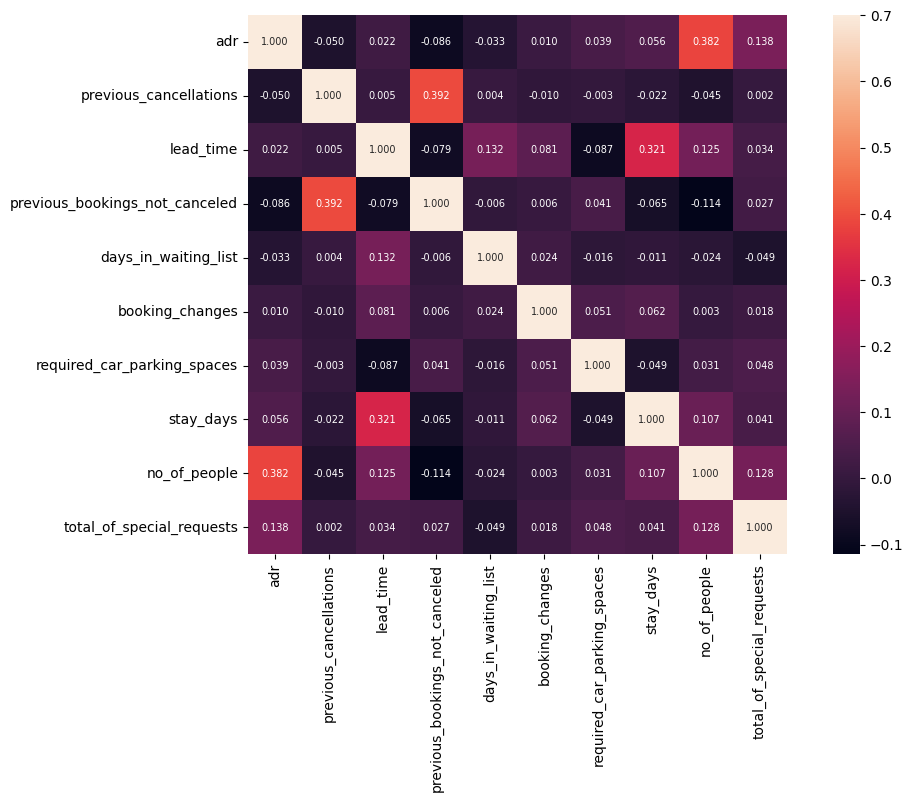

In [36]:
#correlation map
corrmap = corr_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmap,annot = True,fmt='.3f', annot_kws={'size': 7},  vmax=.7, square=True);

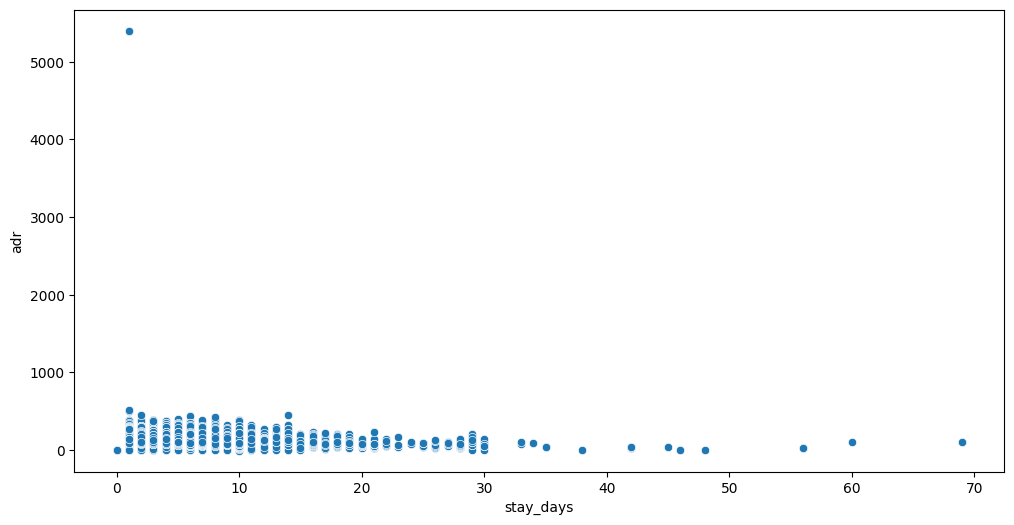

In [37]:
ax_1= df1.loc[:,:]
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'stay_days', data = ax_1)
plt.show()

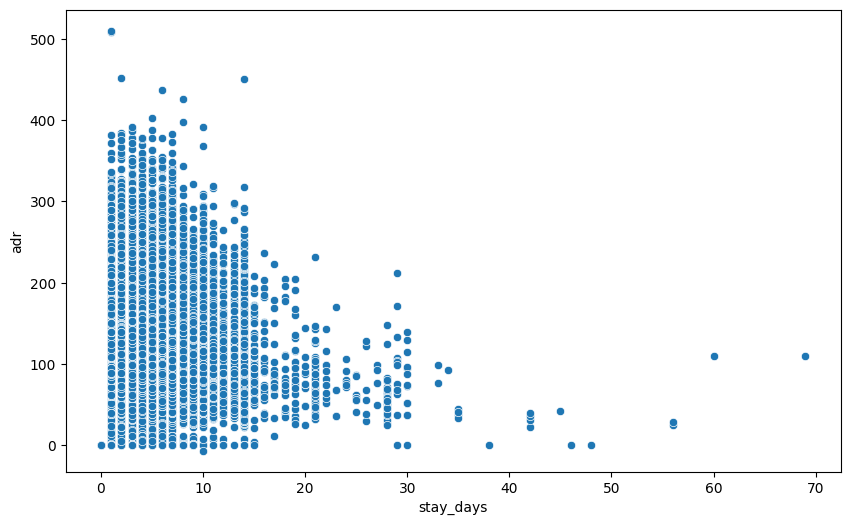

In [38]:
ax_1.drop(ax_1[ax_1['adr'] > 1000].index, inplace = True)
plt.figure(figsize = (10,6))
sns.scatterplot(y = 'adr', x = 'stay_days', data = ax_1)
plt.show()

# **Univariate Analysis**






**Q.1 Which agent has booked most hotel and generate more revenue ?**

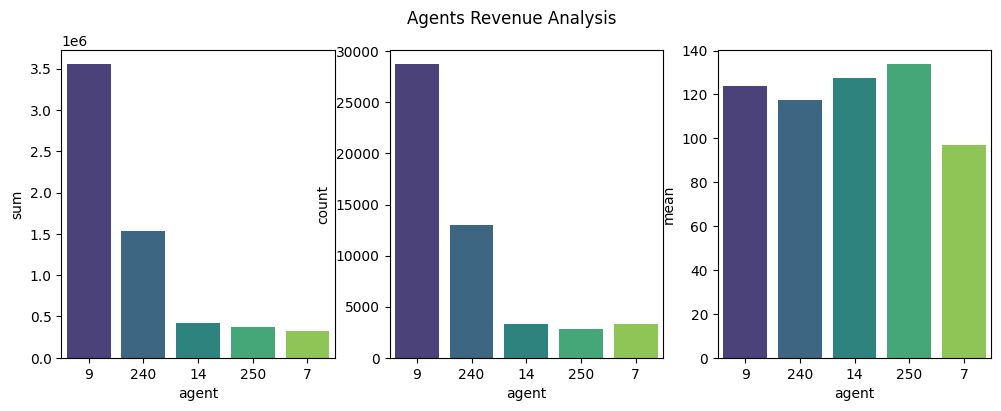

In [39]:
agnt_book = df1[df1['agent'] != 0].groupby(['agent'])['adr'].agg(['sum','count','mean']).sort_values(['sum'],ascending= False)[0:5].reset_index()
agnt_book['agent'] = agnt_book['agent'].map(str)
fig, axes = plt.subplots(1, 3, figsize=(12,4))
fig.suptitle('Agents Revenue Analysis')
ax1 = sns.barplot(ax=axes[0],x= 'agent',y='sum',data=agnt_book,palette ='viridis')
ax2 = sns.barplot(ax=axes[1],x= 'agent',y='count',data=agnt_book,palette ='viridis')
ax3 = sns.barplot(ax=axes[2],x= 'agent',y='mean',data=agnt_book,palette ='viridis')

Agent 9 has highest no of booking and revenue ,but in term of Average Revenue Agent 250 and Agent 14 are the highest

**Q.2 Relation between Revenue and total of special requests?**

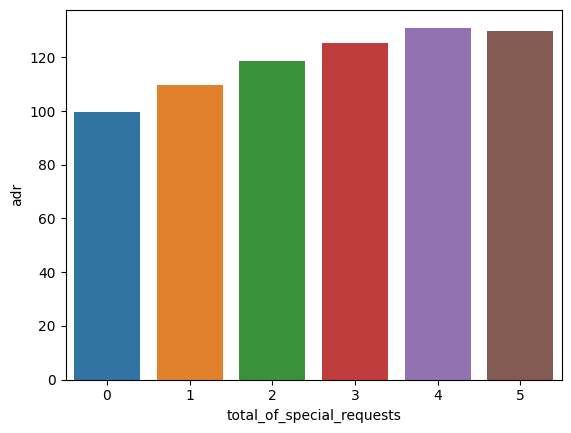

In [40]:
sns.barplot(x="total_of_special_requests", y="adr",data= df1,errorbar = None)
plt.show()

From the barchart it is evident that increase in total_request lead to increase in Revenue.

**Q.2 Which meal type is mostly preferred ?**

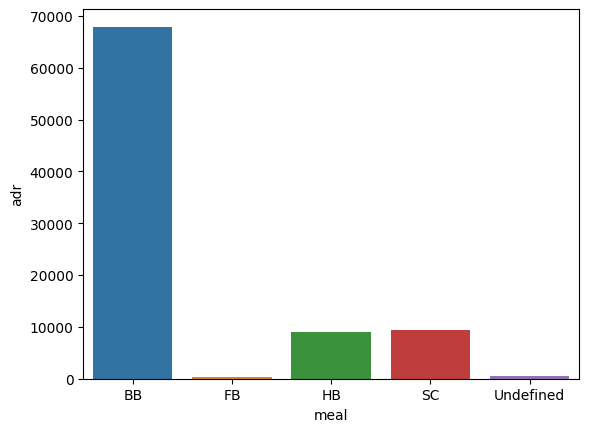

In [41]:
sns.barplot(x="meal", y="adr",data= df1.groupby(['meal'],as_index =False).count(),errorbar = None)
plt.show()

Most of the visitor has opted for only Morning Breakfast(BB),there are also tourist who opted for HB,SC type meal but approximately no visitor has opted for Full Board(FB) type meal

# **Hotel Type Analysis**

**Q.1 Which type of Hotel is mostly booked ?**

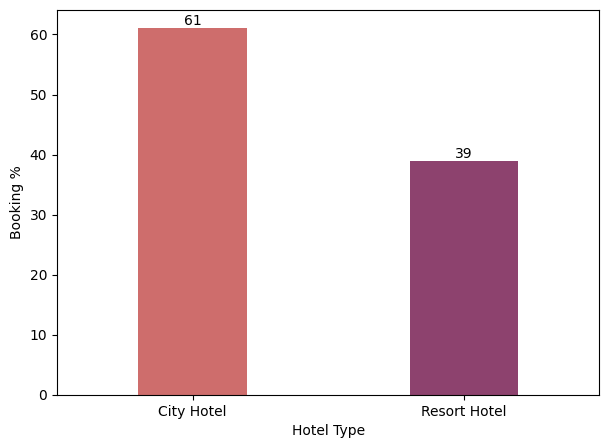

In [42]:
df_hotel = df1.groupby(['hotel'],as_index = False).count().rename(columns ={'index':'Hotel Count'})[['hotel','Hotel Count']]
df_hotel['Hotel Count'] = (df_hotel['Hotel Count'] / df_hotel['Hotel Count'].sum()) * 100
plt.figure(figsize = (7,5))
ax =sns.barplot(x = df_hotel['hotel'], y = df_hotel['Hotel Count'],palette= 'flare',width = 0.4)
for i in ax.containers:
  ax.bar_label(i, fmt=lambda x: '{:.0f}'.format(x))
plt.xlabel('Hotel Type')
plt.ylabel('Booking %')
plt.show()

**Q.2 Median lead time of each Hotel ?**

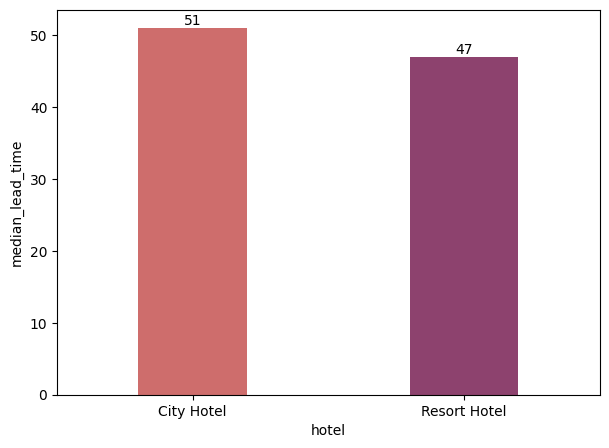

In [43]:
df_hotel = df1.groupby('hotel')
le_ti = df_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (7,5))
ax =sns.barplot(x = le_ti['hotel'], y = le_ti['median_lead_time'],palette= 'flare',width = 0.4 )
for i in ax.containers:
  ax.bar_label(i, fmt=lambda x: '{:.0f}'.format(x))
plt.show()

Both hotel has almost same median lead time,so Hotel type does not play a part in lead time

**Q.3 What are number of days of stay in each hotel ?**

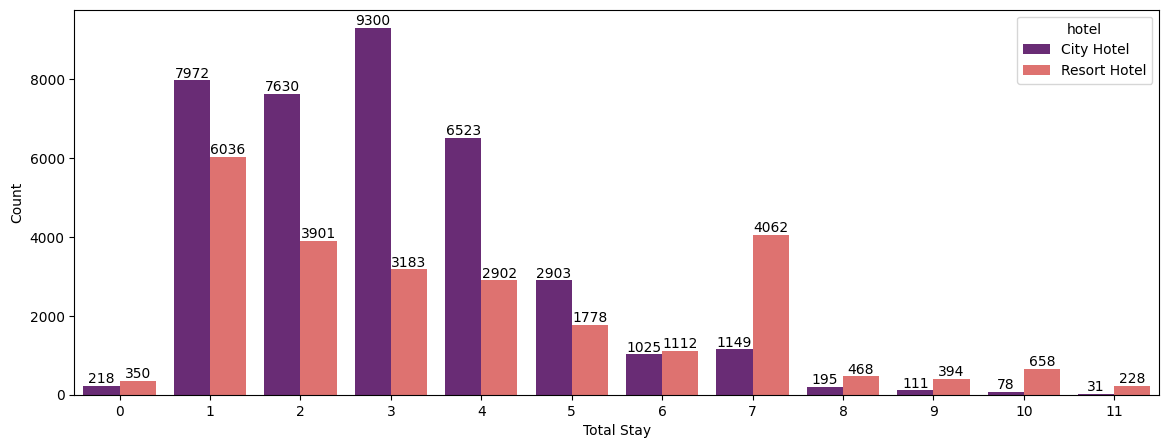

In [44]:
total_stay = df1[(df1['is_canceled'] == 0) & (df1['stay_days']  <12)].groupby(['hotel','stay_days'],as_index = False).count()
plt.figure(figsize = (14,5))
ax=sns.barplot(x = 'stay_days', y= 'adr', hue = 'hotel', data = total_stay, palette = 'magma')
for i in ax.containers:
  ax.bar_label(i, fmt=lambda x: '{:.0f}'.format(x))
plt.xlabel('Total Stay')
plt.ylabel('Count')
plt.show()

People mostly stayed for upto 4 days .Highest number of days of stay is 1.
For long days people mostly prefer Resort Hotel and for short days ,City Hotel.\
For Resort Hotel there is drastically increase increase in number for One Week
,this may be because there is better deal for a week in Resort Hotel.

In the data we have catgories the  customers into Couple,Family and Not Family.\
Note this is purely assumption as it is not given in the data.

In [45]:
famly = df1.loc[:,['hotel','adults','children','babies']]
conditions = [
    ((famly['babies'] > 0) | (famly['children'] > 0) & (famly['adults'] > 0)),
    ((famly['babies'] == 0) & (famly['children'] == 0) & (famly['adults'] == 2)),
    ((famly['babies'] == 0) & (famly['children'] == 0) |(famly['adults'] == 0) )
]
results = ['Family', 'Couple','Not Family']
famly['guest_type'] = np.select(conditions, results)

**Q.4 Which group has stayed the most often at each type of hotel?**

(0.0, 40000.0)

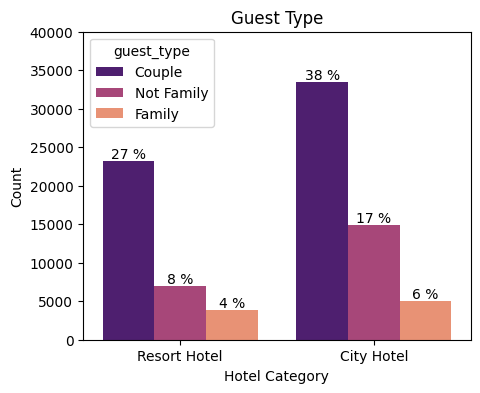

In [46]:
famy = famly.groupby(['hotel','guest_type'],as_index= False).count().sort_values(['hotel','adults'],ascending= False)
plt.figure(figsize = (5,4))
ax=sns.barplot(x = 'hotel', y= 'adults', hue = 'guest_type', data = famy, palette = 'magma')
for i in ax.containers:
  ax.bar_label(i, fmt=lambda x: '{:.0f} %'.format(x /872.25))
plt.title('Guest Type')
plt.xlabel('Hotel Category')
plt.ylabel('Count')
plt.ylim(0,40000)



From this chart we can analyse that most(65%) of the visitor type are couple's  and after most of the visitor are Not family(25%)

# **Time Analysis**

In [47]:
famly['arrival_date_month'] = df1['arrival_date_month']
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June','July','Aug','Sep','Oct','Nov','Dec']
fam = famly.groupby(['arrival_date_month'],as_index = False)['arrival_date_month'].value_counts(normalize =False)
fam['Month_No'] = fam.apply(lambda row: month_dict.get(row.arrival_date_month) , axis = 1)
fam_cate = famly.groupby(['guest_type'],as_index = False)['arrival_date_month'].value_counts(normalize =False)
fam_cate['Month_No'] = fam_cate.apply(lambda row: month_dict.get(row.arrival_date_month) , axis = 1)

**Q.1 Which category visit most in specific months?**

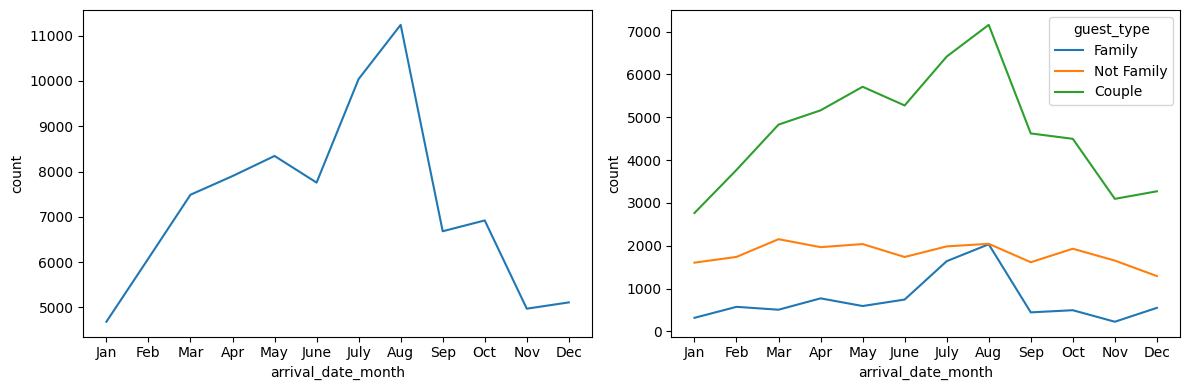

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.lineplot(ax= axes[0],x= 'arrival_date_month',y='count', data=fam.sort_values(['Month_No'],ascending= True),errorbar=None)
sns.lineplot(ax= axes[1],x= 'arrival_date_month',y='count',hue='guest_type', data=fam_cate.sort_values(['Month_No'],ascending= True),errorbar=None)
plt.xticks(['January','February','March','April','May','June','July','August','September','October','November','December'], labels)
plt.setp(axes, xticks=['January','February','March','April','May','June','July','August','September','October','November','December'], xticklabels=labels)
plt.tight_layout()

August and July is the most visited month of the year.\
This is maybe mostly summer holidays lie in July and August.  

**Q.2 What are the average revenue collection in each month ?**

In [49]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
reser_date = df1[['hotel','arrival_date_year','arrival_date_month','adr']].groupby(['hotel','arrival_date_year','arrival_date_month'])['adr'].agg(['sum','count','mean']).reset_index()
reser_date['Month_No'] = reser_date.apply(lambda row: month_dict.get(row['arrival_date_month']) , axis = 1)
re_da= reser_date.sort_values(['hotel','Month_No'],ascending= True)

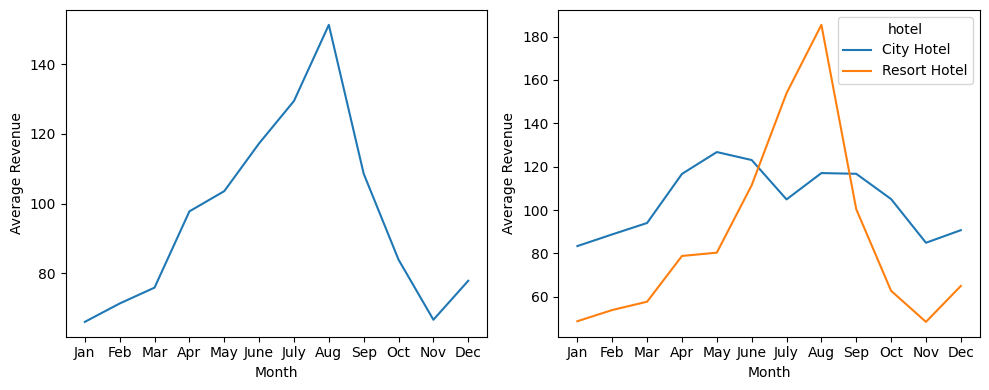

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.lineplot(ax=axes[0],x= 'arrival_date_month',y='mean', data=re_da,errorbar=None)
sns.lineplot(ax=axes[1],x= 'arrival_date_month',y='mean',hue='hotel', data=re_da,errorbar=None)
plt.setp(axes, xticks=['January','February','March','April','May','June','July','August','September','October','November','December'], xticklabels= labels)
for i in range(2):
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel('Average Revenue')
fig.tight_layout()

This show that revenue increases upto August and started to fall after that .\
The revenue of resort is highest in July and August where as the revenue of city decreases in this month.\
This showthat there is very high demand of resort in July and August.

**Q.3 What are the date which are mostly visited ?**

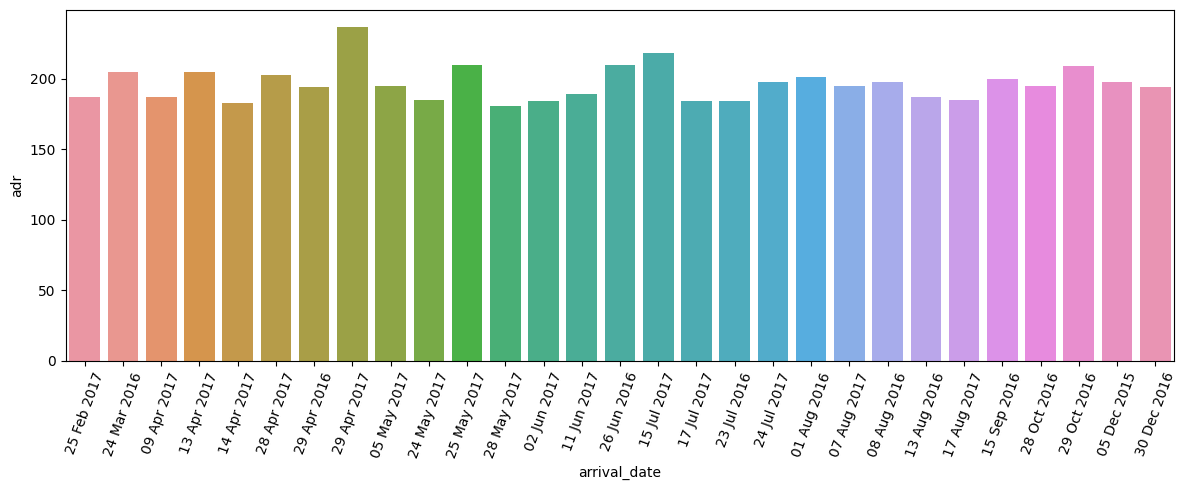

In [51]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
day_ana = df1.loc[:,['arrival_date','adr','arrival_date_month']]
day_ana['Month_No'] = day_ana.apply(lambda row: month_dict.get(row['arrival_date_month']) , axis = 1)
day_ana = day_ana.groupby(['Month_No','arrival_date'],as_index =False).count().sort_values(['Month_No','arrival_date'],ascending =True)
day_ana = day_ana[day_ana['adr'] >= 180]
fig, ax = plt.subplots( figsize=(12,5))
sns.barplot(x= 'arrival_date',y='adr', data=day_ana,errorbar=None)
plt.xticks(rotation = 70)
fig.tight_layout()


Highest number of visitor in a day is in April.\
April have 6 days and August have 5 day where visitor is greater than 180.\
April is not the most visited month but there are some days in which April have very high visitor

**Q.4 What are the days of the week mostly visited ?**

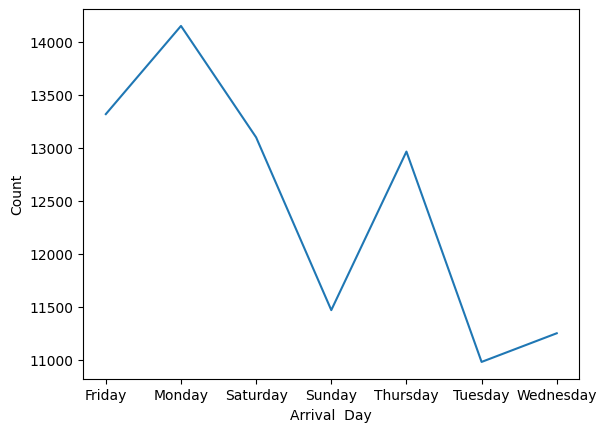

In [52]:
arrival_days = df1.groupby(['arrival_day'],as_index =False)['adr'].count()
sns.lineplot(x= 'arrival_day',y='adr', data= arrival_days,errorbar=None)
plt.xlabel('Arrival  Day')
plt.ylabel('Count')
fig.tight_layout()

Customer mostly arrive in Monday and Friday,\
The high number of visitor in Friday may be due to weekends

**Arrival day vs total stay**

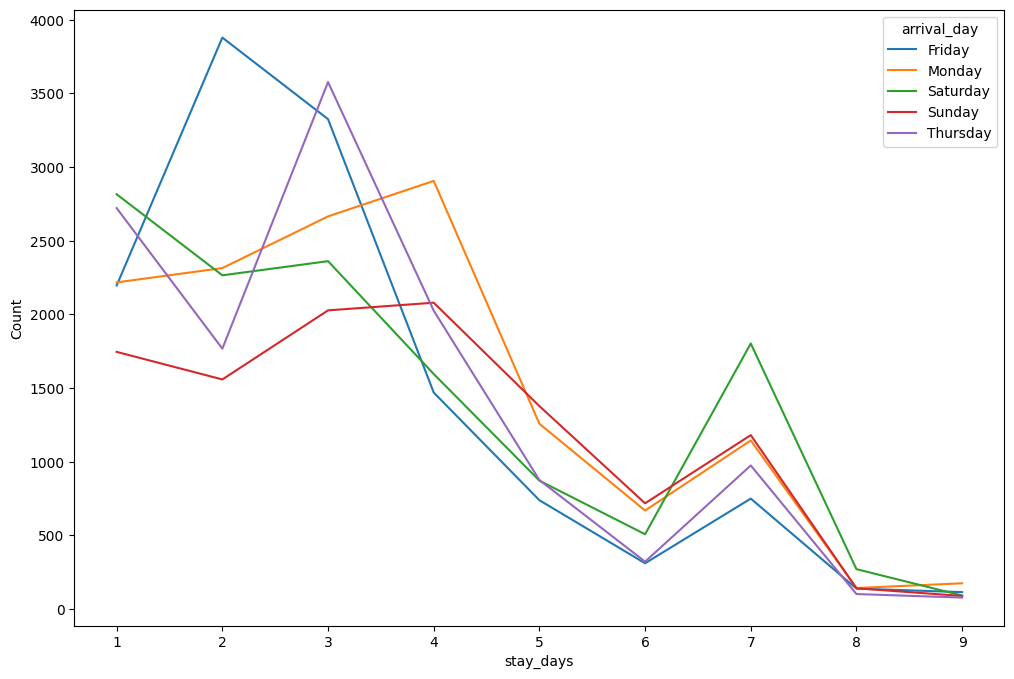

In [53]:
arrival_days = df1[(df1['stay_days']<10) & (df1['stay_days']>0) & (df1['arrival_day'] != 'Tuesday') & (df1['arrival_day'] != 'Wednesday') ].groupby(['arrival_day','stay_days'],as_index =False)['adr'].count()
plt.figure(figsize = (12,8))
sns.lineplot(x= 'stay_days',y='adr',hue = 'arrival_day', data= arrival_days,errorbar=None)
plt.ylabel('Count')
fig.tight_layout()

Friday has highest number of 2 day visit,which can be weekend holidays,\
Monday has normally constant count of total_stay upto 4 days.

# **Market Segment**

**Which market segment attract more customer ?**

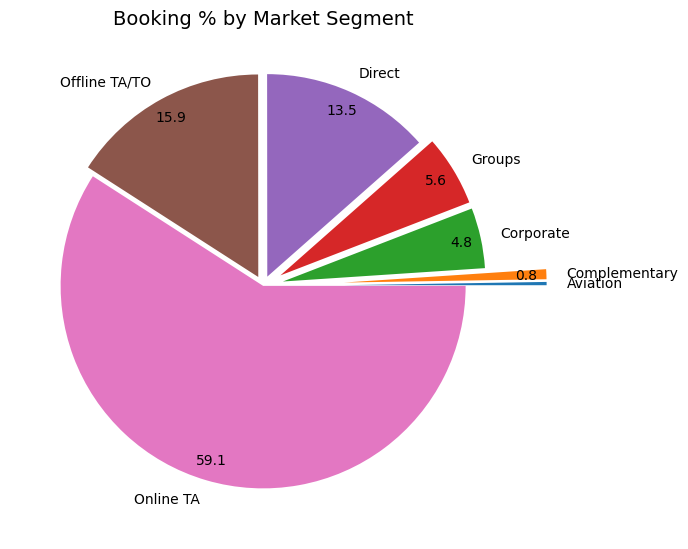

In [54]:
mark_seg = df1.groupby(['market_segment'],as_index =False).count().rename(columns ={'index':'Hotel Count'}).sort_values(['Hotel Count'],ascending= True)
fig, ax = plt.subplots(figsize=(7,7 ))
def autopct(pct):
  return ('%.1f' % pct) if pct > 0.5 else ''
plt.pie(mark_seg['Hotel Count'],labels=mark_seg['market_segment'],autopct =autopct,explode =(0.4,0.4,0.1,0.1,0.05,0.05,0),pctdistance=0.9)
plt.title("Booking % by Market Segment", fontsize=14);
plt.tight_layout()

Almost (59%) of people belong to online TA market segment whereas Offline TA/TO has (15.9%) market segment followed by Direct(13.5%)

**Market Segment according to Hotel type ?**

(0.0, 40000.0)

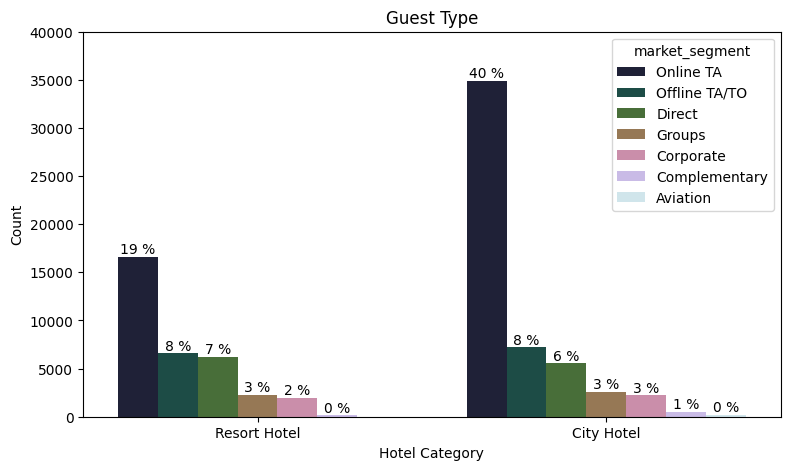

In [55]:
mark_seg = df1.groupby(['hotel','market_segment'],as_index =False).count().rename(columns ={'index':'Hotel Count'}).sort_values(['hotel','Hotel Count'],ascending= False)
plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'hotel', y= 'Hotel Count', hue = 'market_segment', data = mark_seg, palette = 'cubehelix',)

for i in ax.containers:
  ax.bar_label(i, fmt=lambda x: '{:.0f} %'.format(x /872.25))
plt.title('Guest Type')
plt.xlabel('Hotel Category')
plt.ylabel('Count')
plt.ylim(0,40000)



**Market Segment revenue according to Hotel type ?**

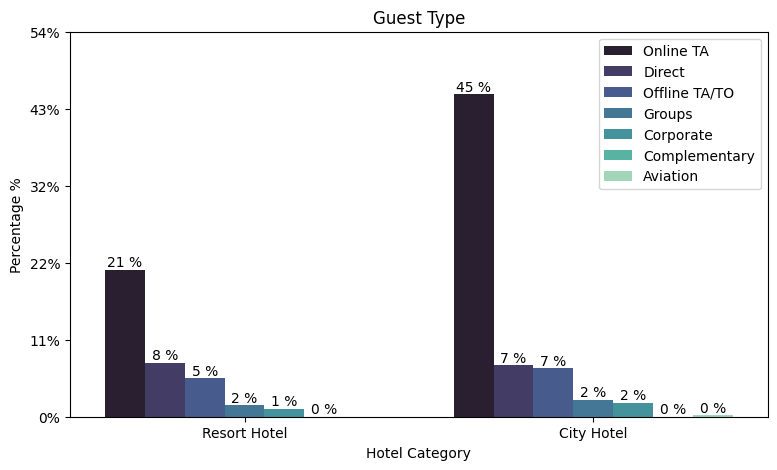

In [56]:
import matplotlib.ticker as mtick
reve_col = df1.groupby(['hotel','market_segment'],as_index =False)['adr'].sum().sort_values(['hotel','adr'],ascending= False).unstack()
plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'hotel', y= 'adr', hue = 'market_segment', data = reve_col, palette = 'mako',)
for i in ax.containers:
  ax.bar_label(i, fmt=lambda x: '{:.0f} %'.format(x*100/sum(reve_col['adr'])))
plt.title('Guest Type')
plt.xlabel('Hotel Category')
plt.ylabel('Percentage %')
plt.ylim(0,5000000)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=sum(reve_col['adr'])))

From the graph we can asssume that in term of revenue Online TA city hotel has highest revenue and also highest Average Revenue.

# **Room Assigned and cancellation Analysis**
**Which type of room is mostly demanded ?**

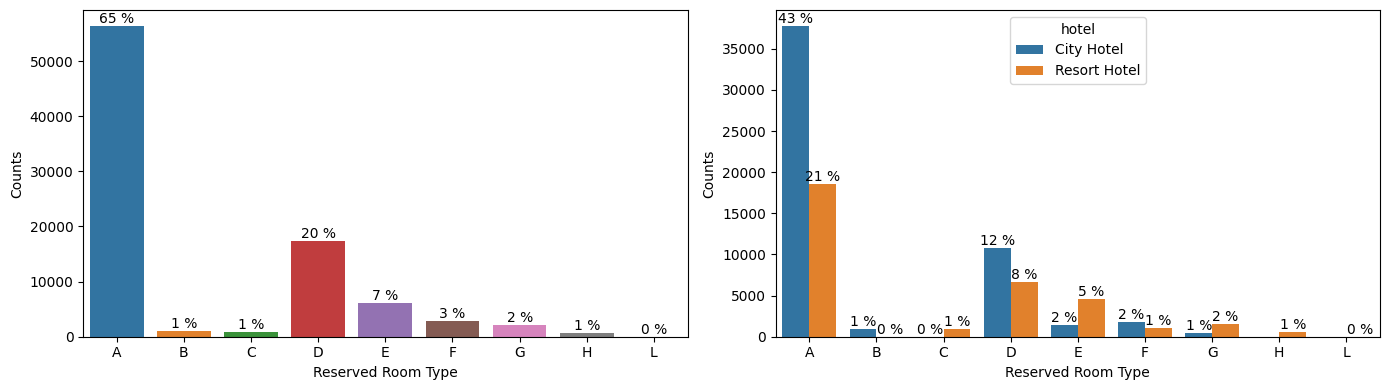

In [57]:
room_type = df1[['hotel','assigned_room_type','reserved_room_type','adr']].groupby(['reserved_room_type'],as_index =False)['adr'].count()
hote_room_ty = df1[['hotel','assigned_room_type','reserved_room_type','adr']].groupby(['hotel','reserved_room_type'],as_index =False)['adr'].count()
fig, axes = plt.subplots(1, 2, figsize=(14,4))
ax =sns.barplot(ax=axes[0],x= 'reserved_room_type',y='adr', data=room_type,errorbar=None,)
for i in ax.containers:
  ax.bar_label(i, fmt=lambda x: '{:.0f} %'.format(x*100/len(df1)))
ay =sns.barplot(ax=axes[1],x= 'reserved_room_type',y='adr',hue='hotel', data=hote_room_ty,errorbar=None)
for i in ay.containers:
  ay.bar_label(i, fmt=lambda x: '{:.0f} %'.format(x*100/len(df1)))
ax.set_xlabel('Reserved Room Type')
ax.set_ylabel('Counts')
ay.set_xlabel('Reserved Room Type')
ay.set_ylabel('Counts')
fig.tight_layout()

From the graph we can see most of the reserved room type are A and B

**Which type of room is mostly reserved ?**

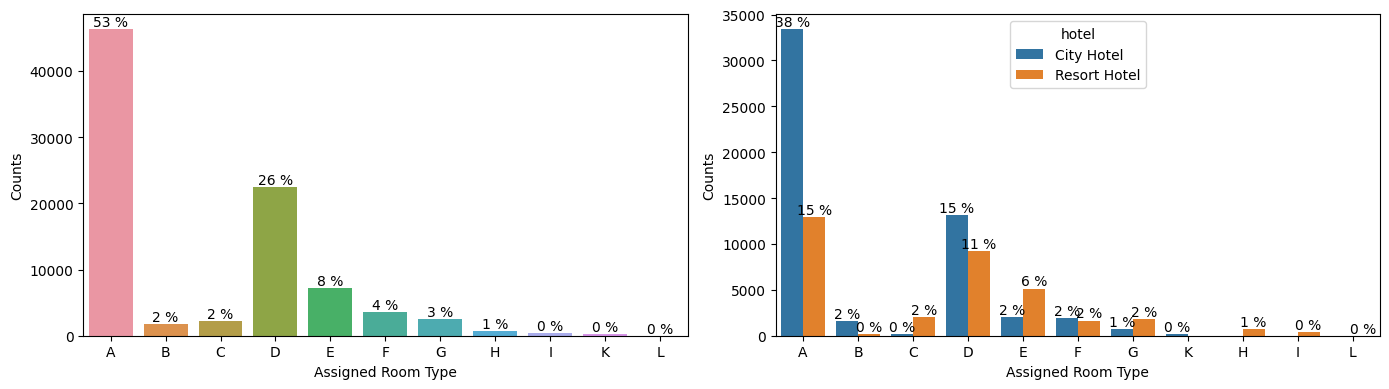

In [58]:
room_type = df1[['hotel','assigned_room_type','reserved_room_type','adr']].groupby(['assigned_room_type'],as_index =False)['adr'].count()
hote_room_ty = df1[['hotel','assigned_room_type','reserved_room_type','adr']].groupby(['hotel','assigned_room_type'],as_index =False)['adr'].count()
fig, axes = plt.subplots(1, 2, figsize=(14,4))

ax = sns.barplot(ax=axes[0],x= 'assigned_room_type',y='adr', data=room_type,errorbar=None)
for i in ax.containers:
  ax.bar_label(i, fmt=lambda x: '{:.0f} %'.format(x*100/len(df1)))
ay = sns.barplot(ax=axes[1],x= 'assigned_room_type',y='adr',hue='hotel', data=hote_room_ty,errorbar=None)
for i in ay.containers:
  ay.bar_label(i, fmt=lambda x: '{:.0f} %'.format(x*100/len(df1)))
ax.set_xlabel('Assigned Room Type')
ax.set_ylabel('Counts')
ay.set_xlabel('Assigned Room Type')
ay.set_ylabel('Counts')
fig.tight_layout()

**Which type of room give highest revenue ?**

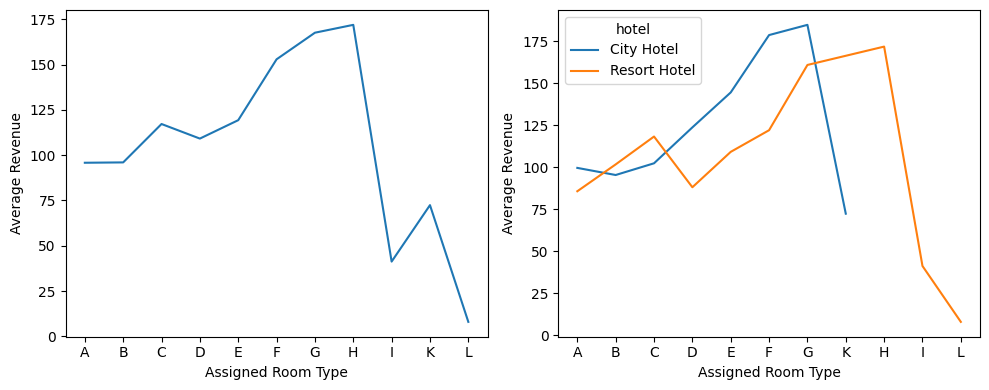

In [59]:
room_type = df1[['hotel','assigned_room_type','reserved_room_type','adr']].groupby(['assigned_room_type'],as_index =False)['adr'].mean()
hote_room_ty = df1[['hotel','assigned_room_type','reserved_room_type','adr']].groupby(['hotel','assigned_room_type'],as_index =False)['adr'].mean()
fig, axes = plt.subplots(1, 2, figsize=(10,4))
for i in range(2):
  axes[i].set_xlabel('Assigned Room Type')
  axes[i].set_ylabel('Average Revenue')
sns.lineplot(ax=axes[0],x= 'assigned_room_type',y='adr', data=room_type,errorbar=None)
sns.lineplot(ax=axes[1],x= 'assigned_room_type',y='adr',hue='hotel', data=hote_room_ty,errorbar=None)
fig.tight_layout()

The Average Revenue increases from Room type A to Room type H,after that it falls drastically.

**What are the percentage of customer assigned ,the reserved room ?**

In [60]:

res_assig =df1.loc[:,['hotel','assigned_room_type','reserved_room_type','is_canceled','adr']]
res_assig['res & assi']=res_assig.apply(lambda x: 'Assigned' if x['assigned_room_type'] == x['reserved_room_type'] else 'Not Assigned',axis =1)
res_assign = res_assig[['hotel','res & assi']].groupby(['hotel'])['res & assi'].value_counts(normalize = False).unstack()
res_assignd = res_assign.copy()
res_assignd['Assigned'] = res_assign['Assigned']*100/(res_assign['Assigned'] + res_assign['Not Assigned'])
res_assignd['Not Assigned'] = res_assign['Not Assigned']*100/(res_assign['Assigned'] + res_assign['Not Assigned'])

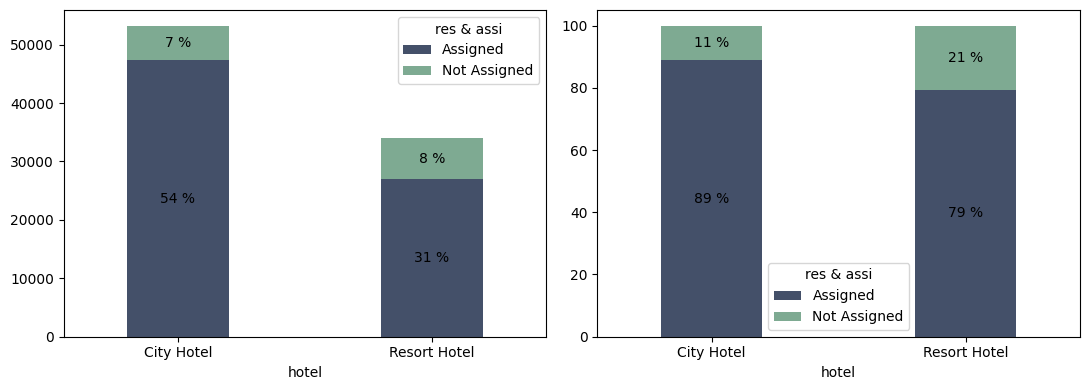

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(11,4))
ax = res_assign.plot(kind='bar', stacked=True, color=['#445069','#7EAA92'],ax=axes[0],width = 0.4,rot = 0)
for c in ax.containers:
    ax.bar_label(c,fmt=lambda x: '{:.0f} %'.format(x*100/len(res_assig['res & assi'])),label_type='center')

ay = res_assignd.plot(kind='bar', stacked=True, color=['#445069','#7EAA92'],ax=axes[1],width = 0.4,rot=0)
for c in ay.containers:
  ay.bar_label(c,fmt=lambda x: '{:.0f} %'.format(x),label_type='center')
fig.tight_layout()

In city Hotel,11% are not Assigned the reserved room whereas\
In resort Hotel,21% are not Assigned the reserved room.\
This means in Resort Hotel there are shortage of specific room types which\
are high in demand

**Not assigned demanded room effects the revenue or not ?**

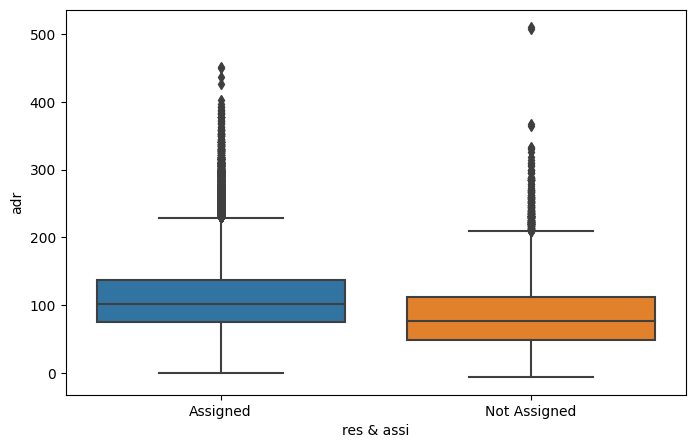

In [62]:
res_assig.drop(res_assig[res_assig['adr'] > 5000].index, inplace = True)
plt.figure(figsize = (8,5))
sns.boxplot(x = res_assig['res & assi'], y = 'adr', data = res_assig)
plt.show()

yes,from the box plot we can say that Not Assigned the same room,\
not only decrease the revenue but it also decrease the chances of best deals.

**Does not assigned the same room effects cancellation ?**

Text(0, 0.5, 'count')

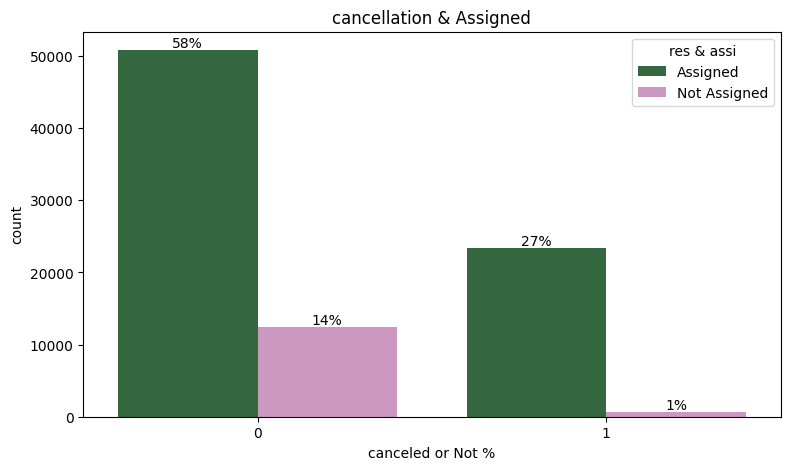

In [63]:
Not_assigned_cancelation = res_assig.copy()
Not_assigned_cancelation = Not_assigned_cancelation.groupby(['res & assi','is_canceled'],as_index = False).count()
plt.figure(figsize = (9,5))
ax=sns.barplot(y = 'hotel', x= 'is_canceled',hue= 'res & assi' ,data = Not_assigned_cancelation, palette = 'cubehelix',)

for i in ax.containers:
  ax.bar_label(i, fmt=lambda x: '{:.0f}%'.format(x/872.25))
plt.title('cancellation & Assigned')
plt.xlabel('canceled or Not %')
plt.ylabel('count')


From this , barplot we can say that not assigned the same room does not effect the cancellation.\
There are other things that  may effects  cancellation
like deposit type,lead time,days in waiting list

**Do lead time and days in waiting list affect cancellation ?**

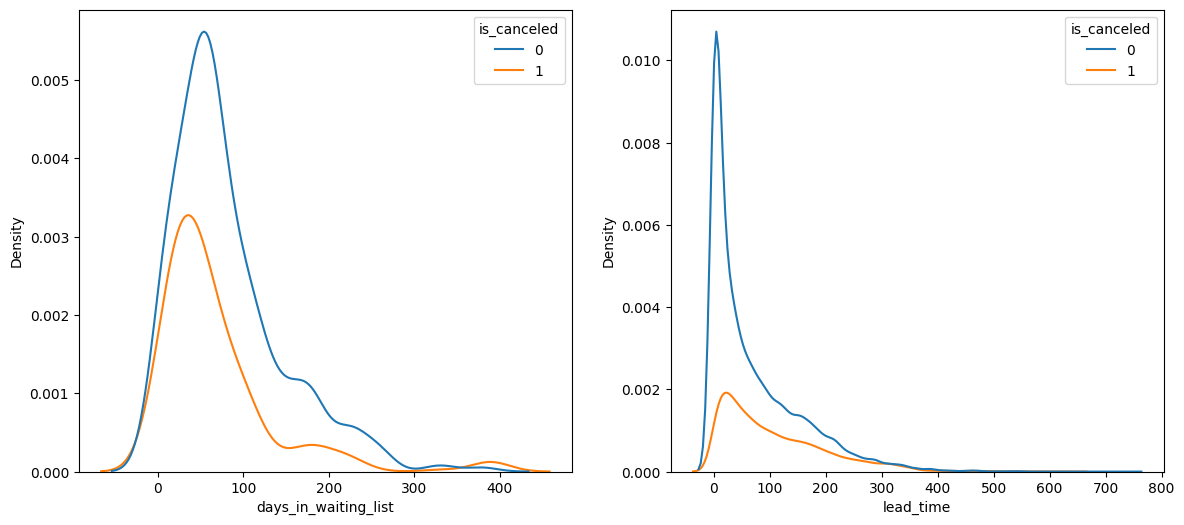

In [64]:
waiting_bookings = df1[df1['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df1['lead_time'], hue = df1['is_canceled'])
plt.show()

While it is evident that the majority of cancelled reservations have waiting periods under 150 days, the majority of confirmed reservations also do. This demonstrates that the waiting period has no affect on booking cancellations.

Booking cancellations are unaffected by lead time since the cancelation and not-cancellation curves are equal for lead time as well.


# **Country wise Analysis**

**What are the most visited country?**

In [65]:
from_country =  df1.loc[:,['hotel','country','adr','arrival_date_year','arrival_date_month','arrival_date_day_of_month','no_of_people','deposit_type','is_canceled']]
from_country.drop(from_country[(from_country['is_canceled'] == 1)  &  (from_country['deposit_type'] == 'No Deposit')].index, inplace = True)

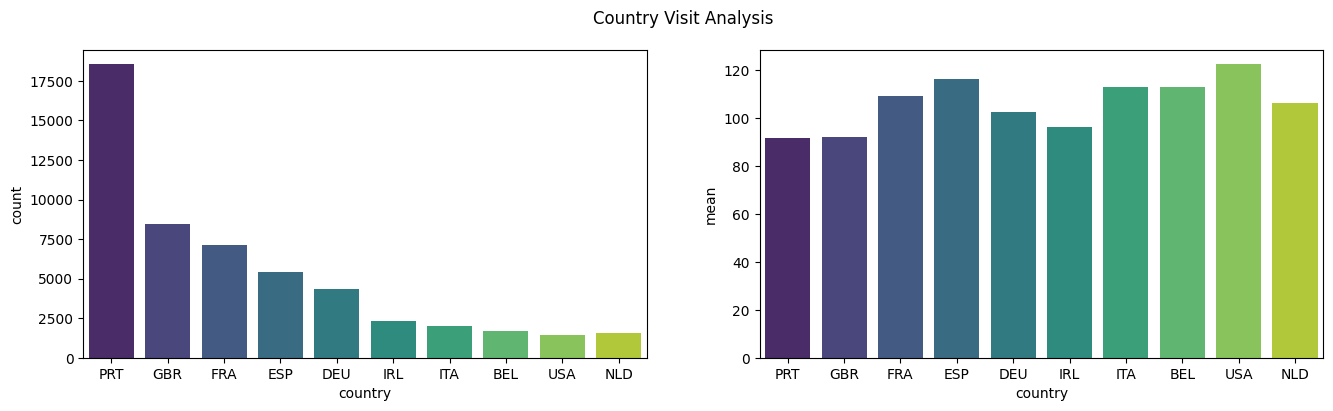

In [66]:
cntry_vsted = from_country.groupby(['country'],as_index =False)['adr'].agg(['sum','count','mean']).sort_values(['sum'],ascending= False)[0:10].reset_index()
fig, axes = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Country Visit Analysis')
ax1 = sns.barplot(ax=axes[0],x= 'country',y='count',data=cntry_vsted,palette ='viridis')
ax2 = sns.barplot(ax=axes[1],x= 'country',y='mean',data=cntry_vsted,palette ='viridis')

From this chart we can see Portugal is the most visited country and in term of continent Europe is the most visited.USA is one of the least visited but it has highest Average Revenue\.

**Which country gives best deals and high revnue ?**

In [67]:
europ_cuntry = country[country['region'] == 'Europe' ][['country code','region']]
dd = pd.merge(from_country, europ_cuntry, left_on='country', right_on='country code', how='inner')

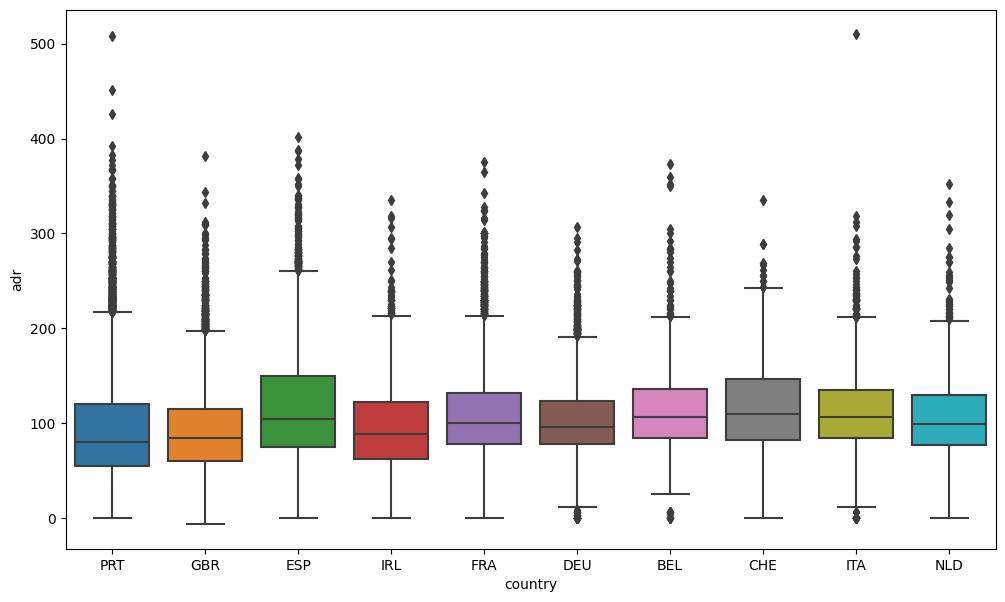

In [68]:
dd.drop(dd[dd['adr'] > 5000].index, inplace = True)
ed = dd[['country','adr','region']].groupby(['country'],as_index = False).count().sort_values(['adr'],ascending = True)
ab = ed.loc[ed['adr'] > 1000,'country']
plt.figure(figsize = (12,7))
sns.boxplot(x = 'country', y = 'adr', data = dd[dd['country'].isin(list(ab))])
plt.show()

Switzerland(CHE),Belgium(BEL) and Spain(ESP) has highest Average Revenue but the best deals are mostly from Spain and Portugal